## 随机游走策略网络嵌入

### DeepWalk网络嵌入(图上的随机游走进行网络嵌入)

1. 图上的随机游走，给定随机游走的长度和起始点
2. 建立随机游走词库
3. 将随机游走词库看成自然语言词库代入Word2Vector生成嵌入向量

### 边强化随机游走

参考文章[Network Danamics of Innovation processes](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.120.048301)

在我们的实验中w代表weighted matrix, p代表transport matrix.
$$P^t(i \rightarrow j)=p_{ij}^t = \frac{w_{ij}^t}{\sum_{l}w_{il}^t}$$

$$w_{ij}^{t+1} = w_{ij}^t + \delta w$$

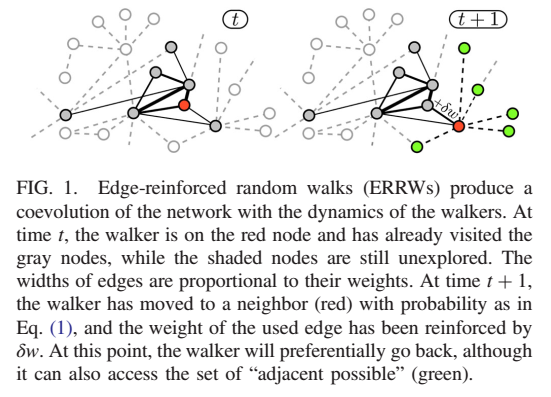

### 点强化随机游走

1. $s_i^t$ 是$i$节点在$t$时刻的值. (value of node $i$)
2. $$p_{ij}^t = \frac{A_{ij}s_j^t}{\sum_lA_{il}s_l^t}$$
3. 从$i$节点走到$j$节点后更新$j$节点的值:(update value of node $j$)
4. $$s_j^{t+1} = s_j^t + \delta s $$

## 社团划分

### 对网络直接进行社团划分

* EdgeB: EdgeBetweenness(ig.community_edge_betweenness)
* FastG: FastGreedy(ig.community_fastgreedy)
* InfoM: InfoMap(ig.community_infomap)
* LabelP:LabelPropagation(ig.community_label_propagation)		
* LeadE: LeadingEigenVector(ig.community_leading_eigenvector)
* Louvain: Louvain(ig.community_multilevel; python_louvain(community))
* SpinG: SpinGlass(ig.community_spinglass)
* WalkT: WalkTrap(ig.community_walktrap)
* MCL: MarkovCluster(markov_cluster)

### 先对网络进行嵌入，再将网络嵌入向量进行聚类(K-Means),聚类在一起的为一个社团

* DeepW: DeepWalk
* EdgeR: EdgeRinforcedRandomWalk
* NodeR: NodeRinforcedRandomWalk
* Grarep:GraRep
* Node2v:Node2Vec

### 真实网络上的NMI(Normalized Mutual Information)

In [9]:
import pandas as pd
data = pd.read_csv("commu_all_3.csv", index_col=0)

In [11]:
data.T

,EdgeB,FastG,InfoM,LabelP,LeadE,Louvain,SpinG,WalkT,MCL,DeepW,EdgeR,NodeR,Grarep,Node2v
karate,0.579828,0.692467,0.699488,0.836498,0.677092,0.687263,0.687263,0.504178,0.836498,0.000439,0.038809,0.016798,1.000000,0.000374
football,0.878888,0.697732,0.924195,0.873711,0.698670,0.890317,0.919047,0.887360,0.924195,0.830127,0.804702,0.799024,0.653746,0.751725
dolphins,0.534765,0.604361,0.566165,0.645475,0.448914,0.513889,0.586466,0.478353,0.453229,0.027702,0.082009,0.000257,0.888836,0.027702
polbooks,0.558451,0.530814,0.493454,0.563723,0.520107,0.536887,0.529349,0.542748,0.520860,0.593894,0.599570,0.549533,0.527986,0.588884
